In [1]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
from autoencoder import Autoencoder_CNN, Autoencoder

seed = 42
random.seed(seed)
np.random.seed(seed)

In [2]:
def plot_comparison(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_shape = x_train.shape[1:]

print (x_train.shape)
print (x_test.shape)

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [4]:
input_dim = x_train.shape[1]

Without hidden layers (mse + relu)

In [5]:
encoding_dim = 2
epochs = 50
batch_size = 256

encoder_layers = []
decoder_layers = []

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim,
                        encoder_layers=encoder_layers,
                        decoder_layers=decoder_layers,
                        loss='mse',
                        activation='relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 5s 7ms/step - loss: 0.1084 - val_loss: 0.0716
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0695 - val_loss: 0.0671
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0652 - val_loss: 0.0637
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0631 - val_loss: 0.0624
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0621 - val_loss: 0.0617
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0613 - val_loss: 0.0610
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0606 - val_loss: 0.0603
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0600 - val_loss: 0.0598
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0595 - val_loss: 0.0592
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0590 - val_loss: 0.0588

Visualization

313/313 [==============================] - 0s 1ms/step


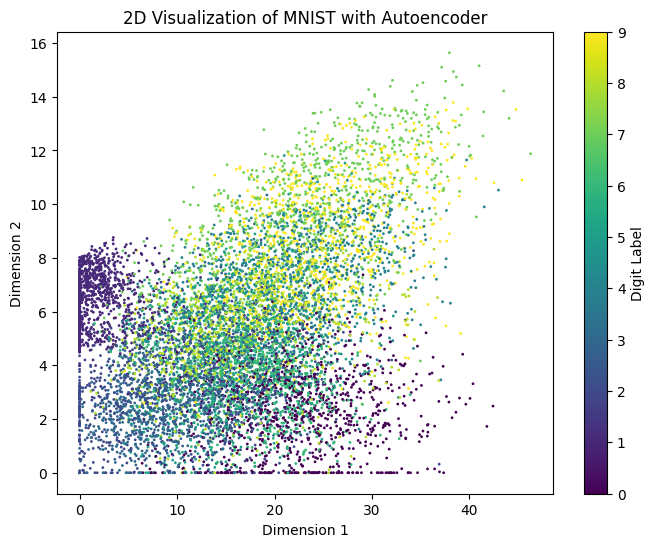

In [6]:
autoencoder.visualize_2d(x_test, y_test, False)

Compression and decompression

In [7]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 0s 1ms/step


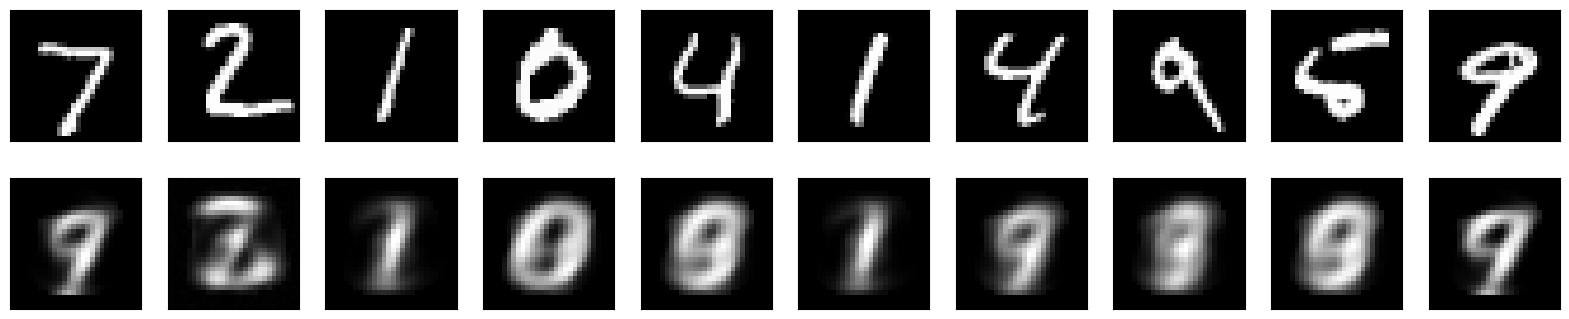

In [8]:
plot_comparison(x_test, decoded_data)

Image generation

1/1 [==============================] - 0s 18ms/step


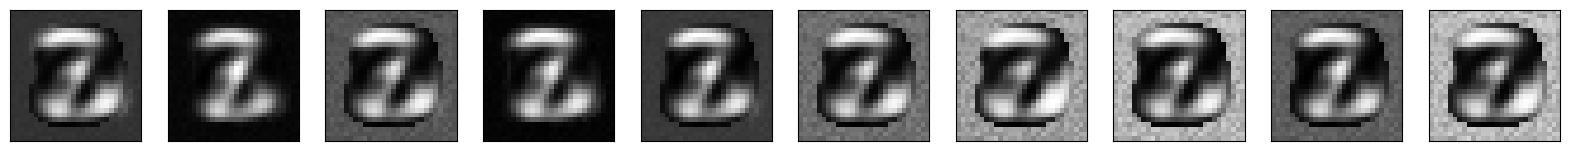

In [9]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

With hidden layers (mse + relu)

In [10]:
encoding_dim = 2
epochs = 50
batch_size = 256

encoder_layers = [64, 128]
decoder_layers = [128, 64]

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='mse',
                        activation='relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.0861 - val_loss: 0.0651
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0635 - val_loss: 0.0620
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0584 - val_loss: 0.0548
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0534 - val_loss: 0.0520
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0513 - val_loss: 0.0504
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0499 - val_loss: 0.0493
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0488 - val_loss: 0.0482
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0476 - val_loss: 0.0472
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0467 - val_loss: 0.0463
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0459 - val_loss: 0.0455

313/313 [==============================] - 1s 2ms/step


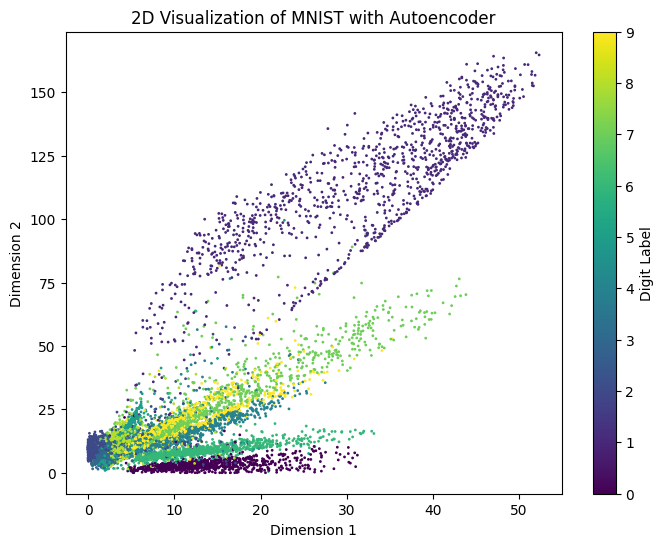

In [11]:
autoencoder.visualize_2d(x_test, y_test, False)

In [12]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 0s 1ms/step


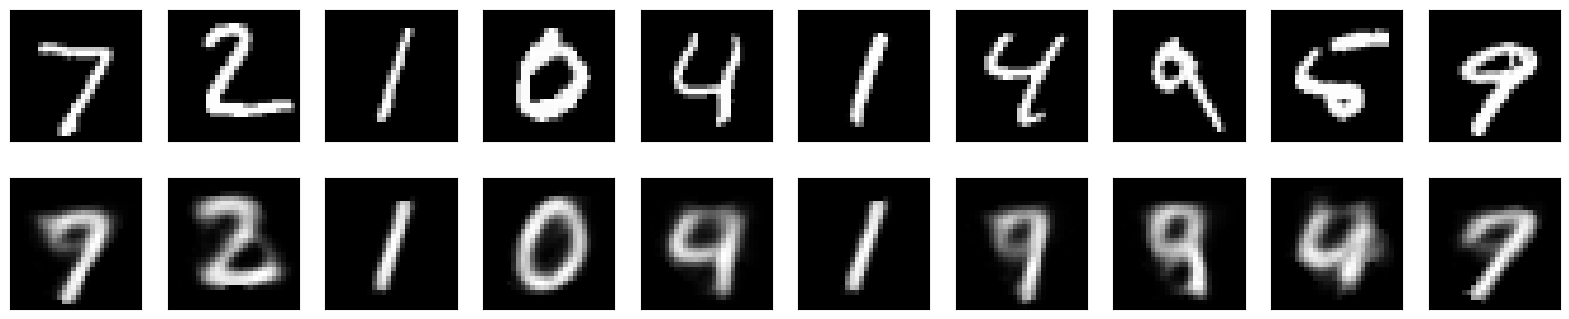

In [13]:
plot_comparison(x_test, decoded_data)

1/1 [==============================] - 0s 20ms/step


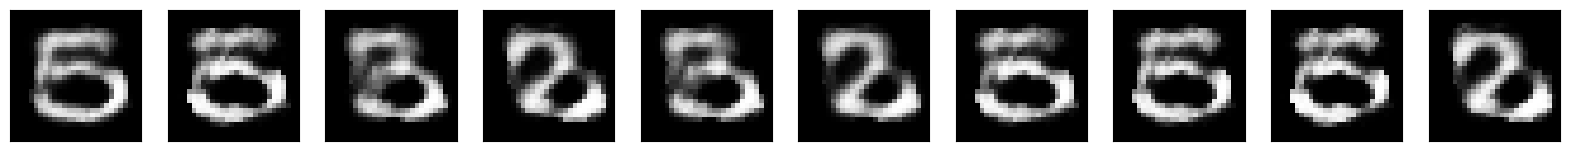

In [14]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Without hidden layers (binary_crossentropy + relu)

In [15]:
encoding_dim = 2
epochs = 50
batch_size = 256

encoder_layers = [64, 128]
decoder_layers = [128, 64]

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='binary_crossentropy',
                        activation='relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2967 - val_loss: 0.2551
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2516 - val_loss: 0.2488
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2468 - val_loss: 0.2442
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2421 - val_loss: 0.2398
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2394 - val_loss: 0.2381
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2368 - val_loss: 0.2327
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2193 - val_loss: 0.2089
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2051 - val_loss: 0.2012
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1997 - val_loss: 0.1981
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1970 - val_loss: 0.1959

313/313 [==============================] - 1s 2ms/step


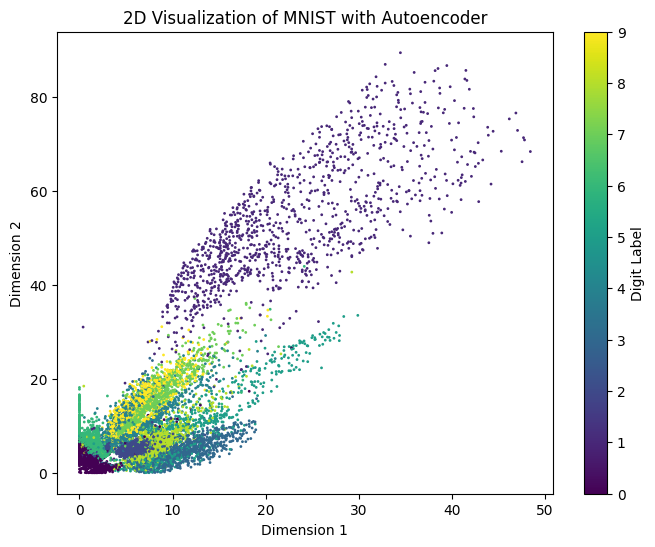

In [16]:
autoencoder.visualize_2d(x_test, y_test, False)

In [17]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 0s 1ms/step


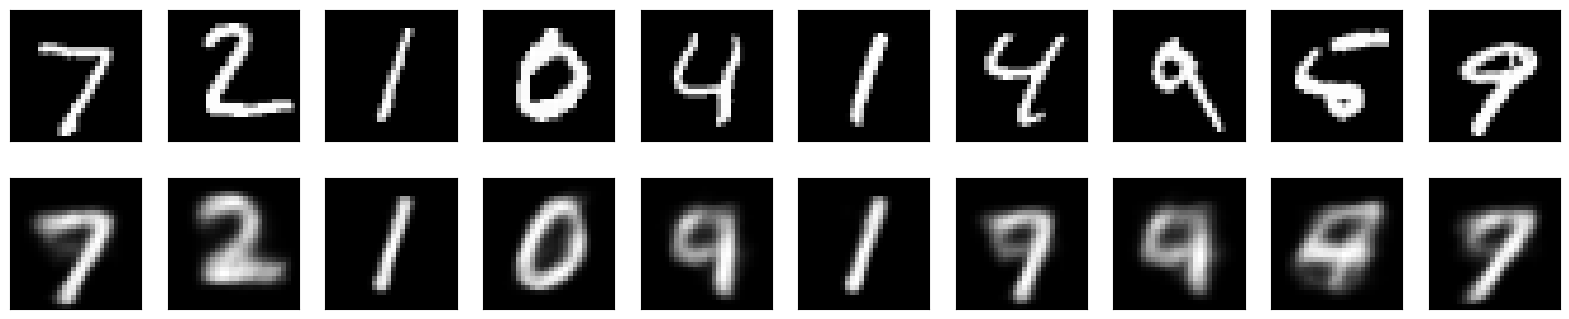

In [18]:
plot_comparison(x_test, decoded_data)

1/1 [==============================] - 0s 18ms/step


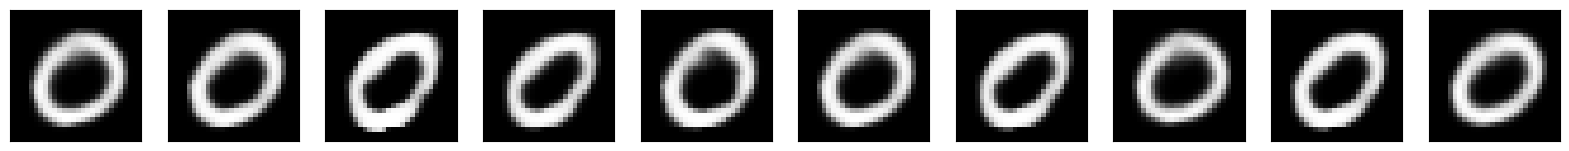

In [19]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

With hidden layers (mse + leaky_relu)

In [7]:
encoding_dim = 2
epochs = 50
batch_size = 256

encoder_layers = [64, 128]
decoder_layers = [128, 64]

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='mse',
                        activation='leaky_relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 5s 8ms/step - loss: 0.0849 - val_loss: 0.0661
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0622 - val_loss: 0.0581
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0556 - val_loss: 0.0536
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0528 - val_loss: 0.0519
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0513 - val_loss: 0.0504
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0500 - val_loss: 0.0491
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0488 - val_loss: 0.0481
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0478 - val_loss: 0.0472
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0469 - val_loss: 0.0464
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0462 - val_loss: 0.0457

313/313 [==============================] - 0s 1ms/step


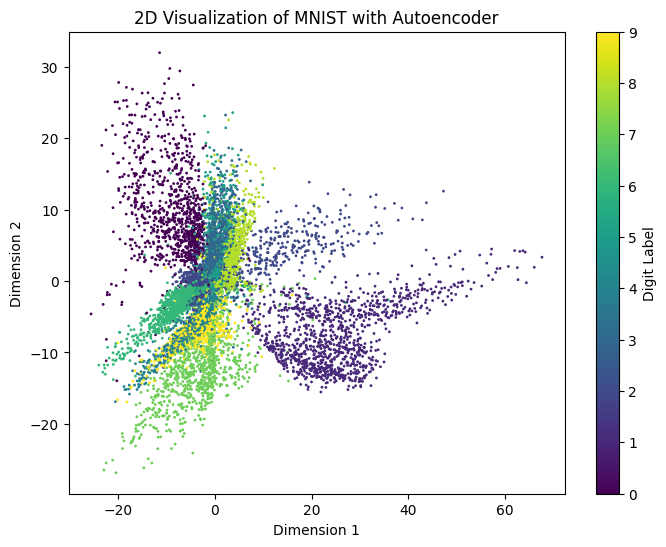

In [8]:
autoencoder.visualize_2d(x_test, y_test, False)

In [9]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 0s 1ms/step


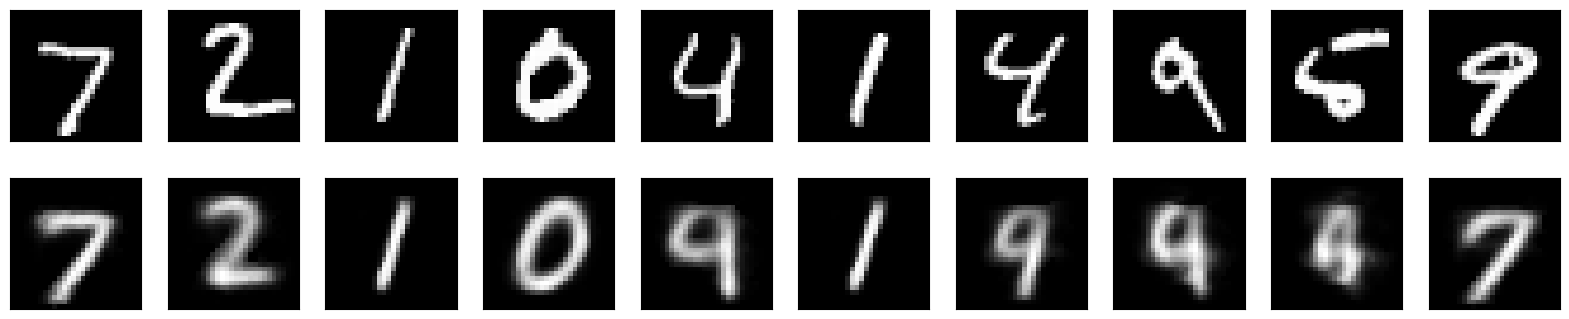

In [10]:
plot_comparison(x_test, decoded_data)

1/1 [==============================] - 0s 12ms/step


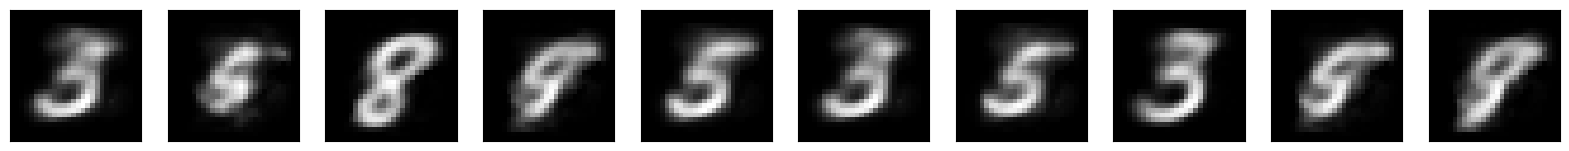

In [11]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

1/1 [==============================] - 0s 16ms/step


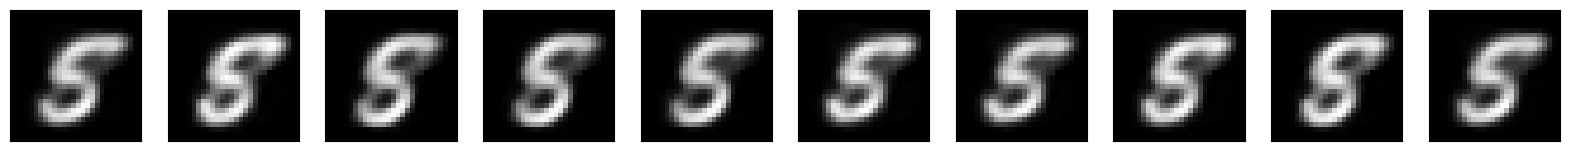

In [12]:
num_samples = 10
random_latent_vectors = np.random.uniform(size=(num_samples, 2))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

With hidden layers (binary_crossentropy + leaky_relu)

In [25]:
encoding_dim = 2
epochs = 100
batch_size = 256

encoder_layers = [64, 128]
decoder_layers = [128, 64]

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='binary_crossentropy',
                        activation='leaky_relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2888 - val_loss: 0.2375
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2284 - val_loss: 0.2202
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2165 - val_loss: 0.2117
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2095 - val_loss: 0.2072
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2052 - val_loss: 0.2039
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2023 - val_loss: 0.2015
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1999 - val_loss: 0.1987
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1974 - val_loss: 0.1967
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1954 - val_loss: 0.1951
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1937 - val_lo

313/313 [==============================] - 1s 1ms/step


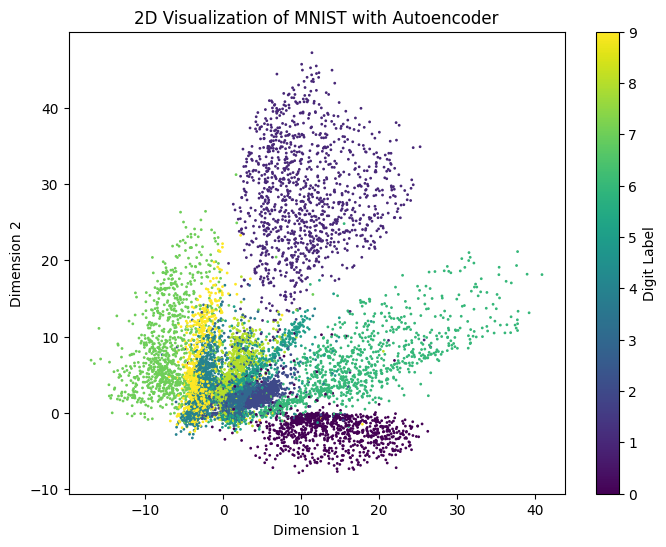

In [26]:
autoencoder.visualize_2d(x_test, y_test, False)

In [27]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 0s 1ms/step


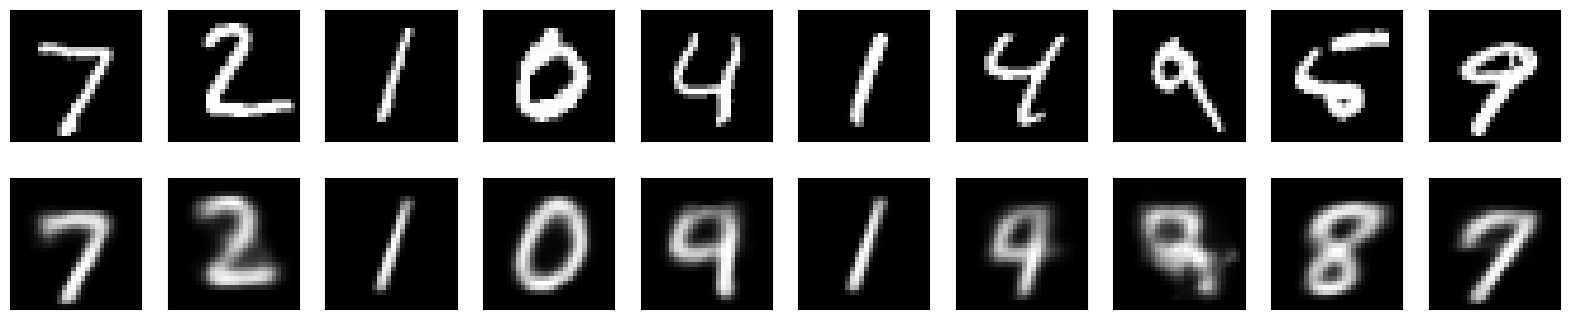

In [28]:
plot_comparison(x_test, decoded_data)

1/1 [==============================] - 0s 19ms/step


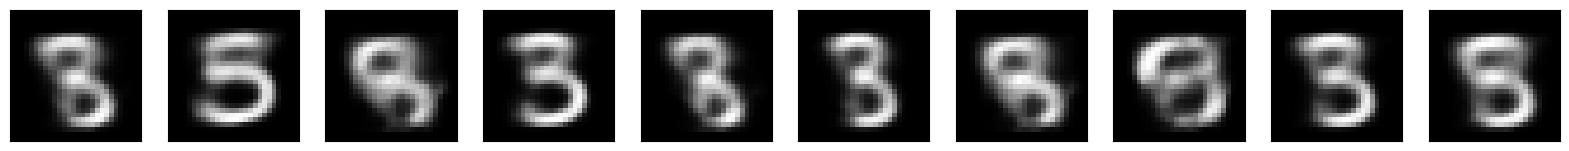

In [29]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

With hidden layers (mse + tanh)

In [30]:
encoding_dim = 2
epochs = 50
batch_size = 256

encoder_layers = [64, 32]
decoder_layers = [32, 64]

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='mse',
                        activation='tanh',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.0849 - val_loss: 0.0677
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0674 - val_loss: 0.0676
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0673 - val_loss: 0.0676
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0673 - val_loss: 0.0675
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0673 - val_loss: 0.0675
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0673 - val_loss: 0.0675
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0673 - val_loss: 0.0675
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0673 - val_loss: 0.0675
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0673 - val_loss: 0.0676
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0673 - val_loss: 0.0675

313/313 [==============================] - 0s 1ms/step


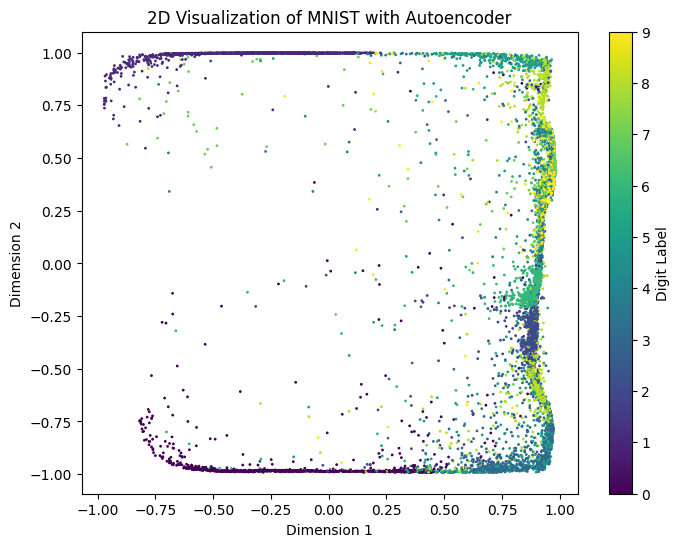

In [31]:
autoencoder.visualize_2d(x_test, y_test, False)

In [32]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 0s 1ms/step


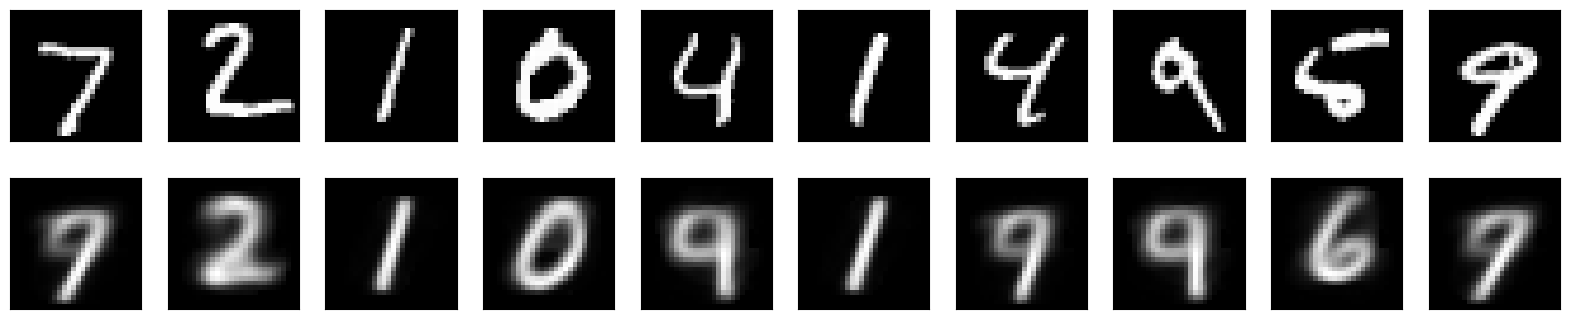

In [33]:
plot_comparison(x_test, decoded_data)

1/1 [==============================] - 0s 16ms/step


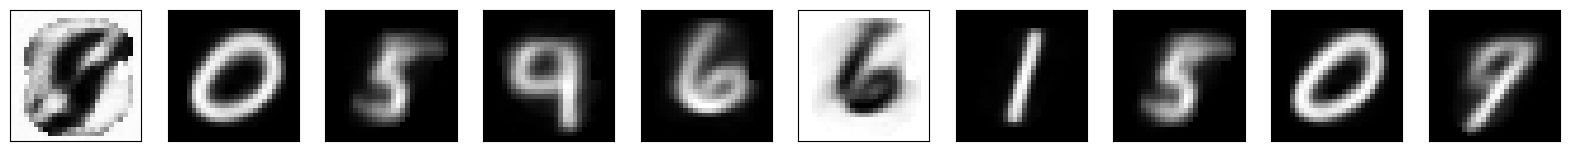

In [34]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

With more hidden layers (mse + tanh)

In [35]:
encoding_dim = 2
epochs = 50
batch_size = 256

encoder_layers = [64, 32, 16, 8]
decoder_layers = [8, 16, 32, 64]

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='binary_crossentropy',
                        activation='leaky_relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.3063 - val_loss: 0.2587
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2546 - val_loss: 0.2493
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2466 - val_loss: 0.2425
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2404 - val_loss: 0.2386
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2377 - val_loss: 0.2353
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2343 - val_loss: 0.2322
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2277 - val_loss: 0.2202
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2142 - val_loss: 0.2080
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2059 - val_loss: 0.2040
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2023 - val_loss: 0.2018

313/313 [==============================] - 1s 2ms/step


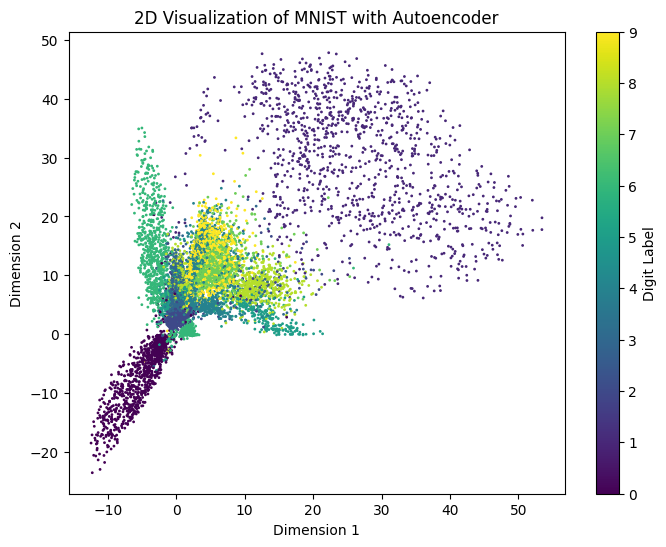

In [36]:
autoencoder.visualize_2d(x_test, y_test, False)

In [37]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 0s 1ms/step


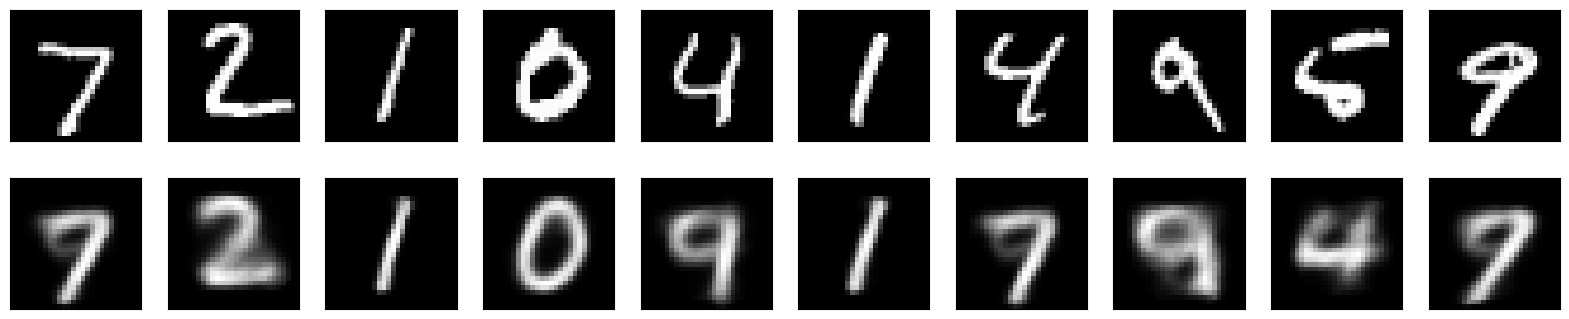

In [38]:
plot_comparison(x_test, decoded_data)

1/1 [==============================] - 0s 22ms/step


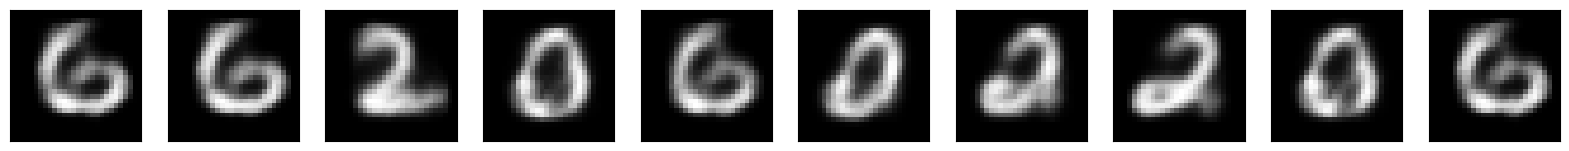

In [39]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [40]:
encoding_dim = 2
epochs = 50
batch_size = 256

encoder_layers = [128, 64, 32, 16, 8, 4]
decoder_layers = [4, 8, 16, 32, 64, 128]

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='binary_crossentropy',
                        activation='leaky_relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 3s 11ms/step - loss: 0.3023 - val_loss: 0.2540
Epoch 2/50
235/235 [==============================] - 2s 11ms/step - loss: 0.2473 - val_loss: 0.2389
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.2317 - val_loss: 0.2239
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2193 - val_loss: 0.2134
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2099 - val_loss: 0.2046
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2025 - val_loss: 0.1995
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1972 - val_loss: 0.1949
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1934 - val_loss: 0.1918
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1906 - val_loss: 0.1897
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1884 - val_lo

313/313 [==============================] - 1s 2ms/step


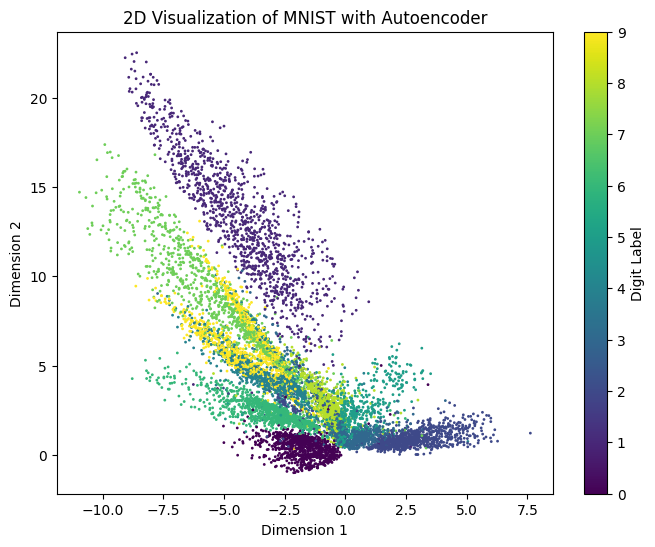

In [41]:
autoencoder.visualize_2d(x_test, y_test, False)

In [42]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 1s 2ms/step


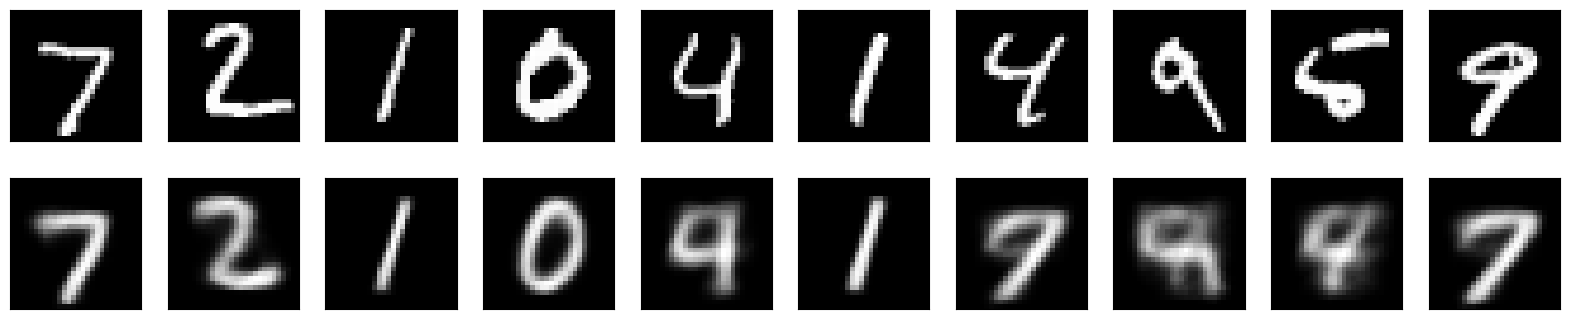

In [43]:
plot_comparison(x_test, decoded_data)

1/1 [==============================] - 0s 18ms/step


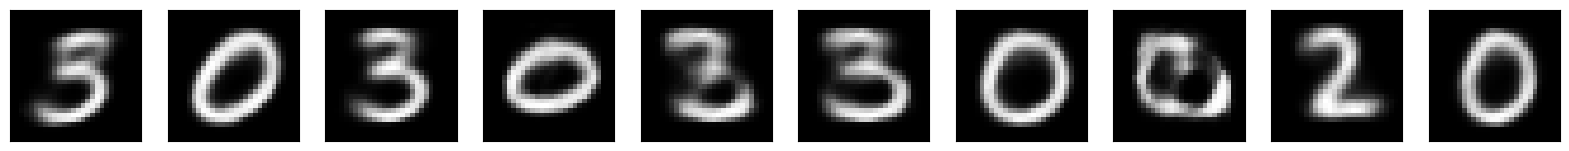

In [44]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [45]:
encoding_dim = 2
epochs = 50
batch_size = 256

encoder_layers = [128, 64, 32, 16, 8, 4]
decoder_layers = [4, 8, 16, 32, 64, 128]

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='binary_crossentropy',
                        activation='tanh',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.2940 - val_loss: 0.2547
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2443 - val_loss: 0.2382
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2359 - val_loss: 0.2316
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2287 - val_loss: 0.2247
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2219 - val_loss: 0.2182
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2176 - val_loss: 0.2149
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2150 - val_loss: 0.2137
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2128 - val_loss: 0.2110
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2112 - val_loss: 0.2097
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2099 - val_los

313/313 [==============================] - 1s 2ms/step


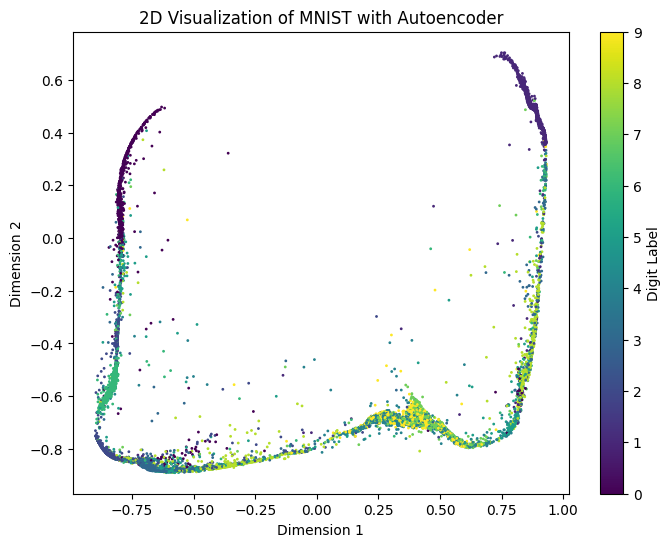

In [46]:
autoencoder.visualize_2d(x_test, y_test, False)

In [47]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 1s 2ms/step


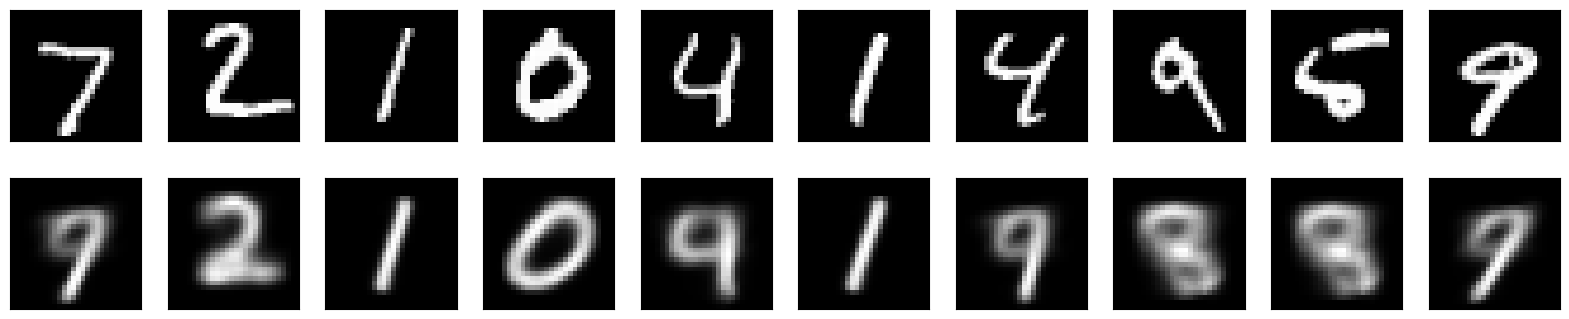

In [48]:
plot_comparison(x_test, decoded_data)

1/1 [==============================] - 0s 15ms/step


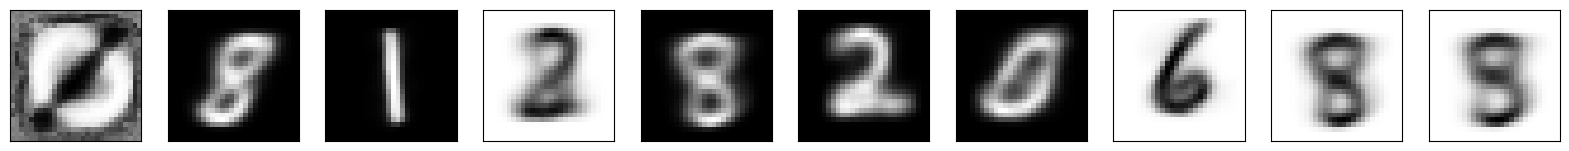

In [49]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255
x_test = np.expand_dims(x_test, -1).astype("float32") / 255
input_dim = x_train.shape[1:]

In [5]:
encoding_dim = 2
epochs = 50
batch_size = 256

autoencoder = Autoencoder_CNN(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        loss='binary_crossentropy',
                        activation='relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 9s 13ms/step - loss: 0.2766 - val_loss: 0.2251
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2184 - val_loss: 0.2143
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2117 - val_loss: 0.2099
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2086 - val_loss: 0.2079
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2068 - val_loss: 0.2062
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2052 - val_loss: 0.2044
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2038 - val_loss: 0.2033
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2026 - val_loss: 0.2026
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.2017 - val_loss: 0.2018
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2010 - val_lo

313/313 [==============================] - 0s 800us/step


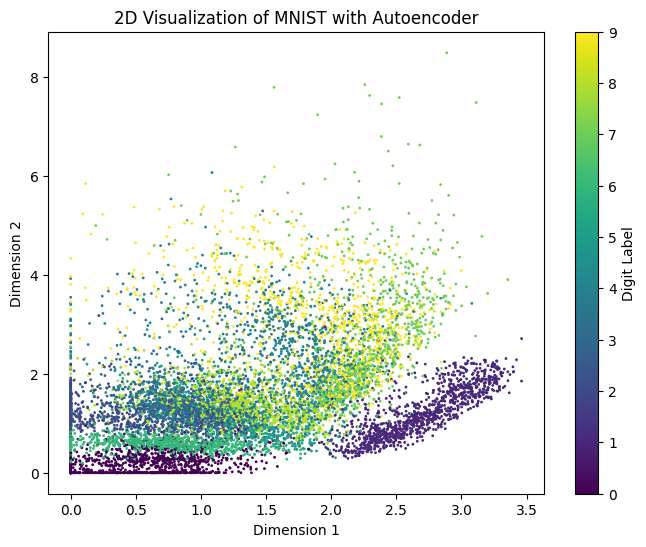

In [6]:
autoencoder.visualize_2d(x_test, y_test, False)

313/313 [==============================] - 0s 1ms/step


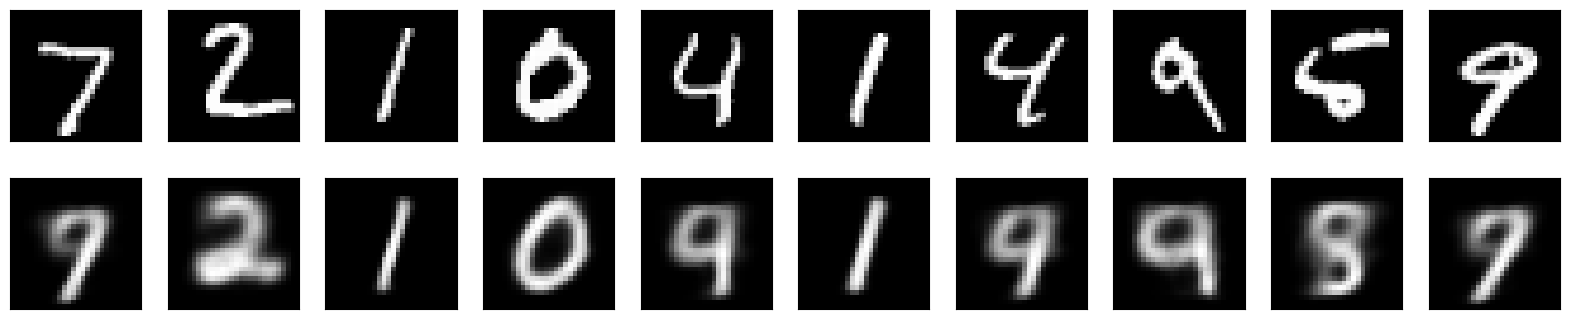

In [7]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

plot_comparison(x_test, decoded_data)

1/1 [==============================] - 0s 7ms/step


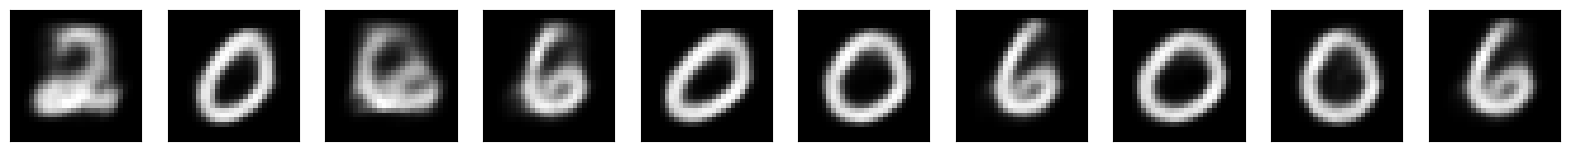

In [11]:
num_samples = 10
random_latent_vectors = np.random.uniform(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(input_dim[0], input_dim[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Test with relu in output of the decoder

In [5]:
encoding_dim = 2
epochs = 50
batch_size = 256

encoder_layers = [64, 128]
decoder_layers = [128, 64]

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='binary_crossentropy',
                        activation='relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 3s 7ms/step - loss: 0.6146 - val_loss: 0.5297
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.5113 - val_loss: 0.4913
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.4731 - val_loss: 0.4699
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.4648 - val_loss: 0.4557
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.4534 - val_loss: 0.4317
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.4222 - val_loss: 0.4164
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.4105 - val_loss: 0.4077
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.4061 - val_loss: 0.4057
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.4051 - val_loss: 0.4042
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.4036 - val_loss: 0.3980

313/313 [==============================] - 1s 1ms/step


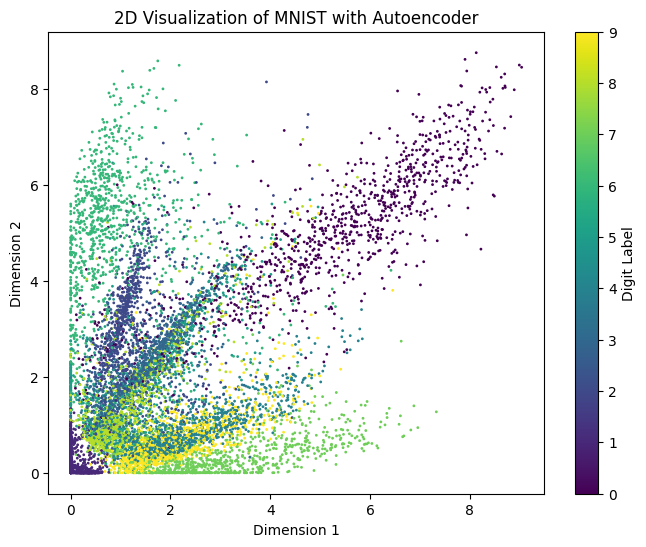

In [6]:
autoencoder.visualize_2d(x_test, y_test, False)

313/313 [==============================] - 0s 1ms/step


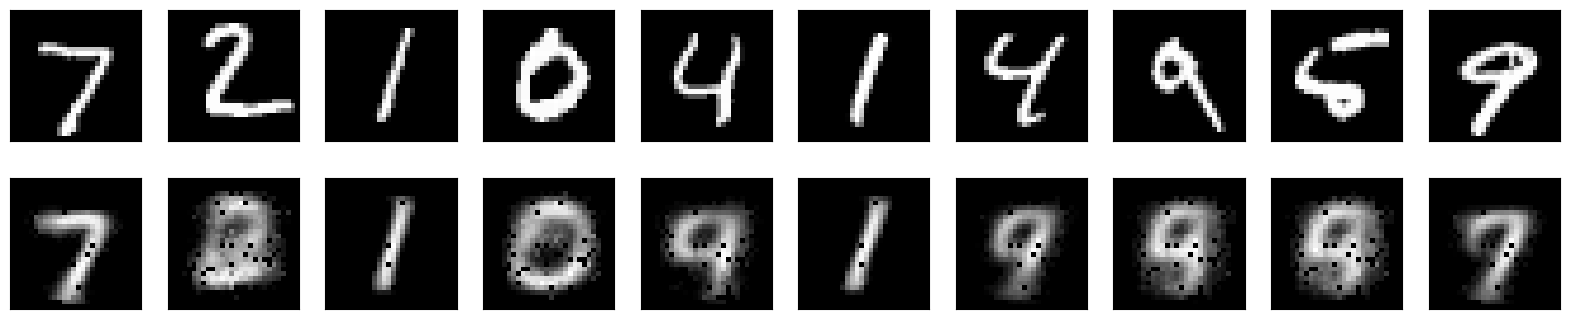

In [7]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

plot_comparison(x_test, decoded_data)

1/1 [==============================] - 0s 24ms/step


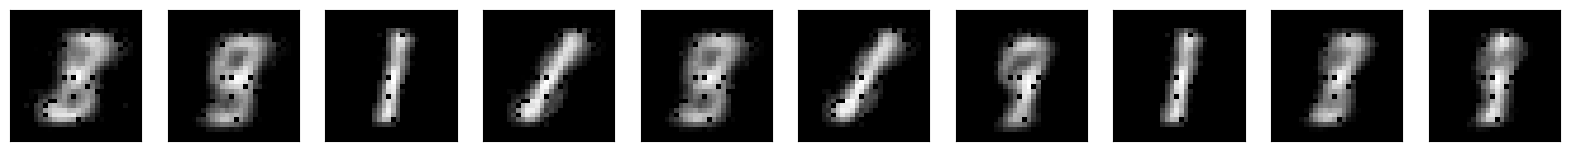

In [8]:
num_samples = 10
random_latent_vectors = np.random.uniform(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()